In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[[170.  70.]
 [150.  45.]
 [160.  55.]
 [170.  60.]
 [178.  80.]]
   height  weight
0   170.0    70.0
1   150.0    45.0
2   160.0    55.0
3   170.0    60.0
4   178.0    80.0


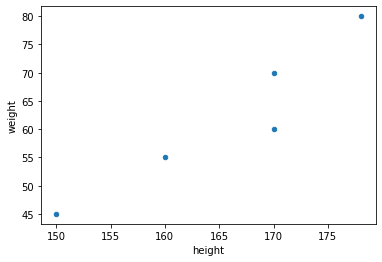

In [8]:
np_data = np.array([
                    [170, 70],
                    [150, 45],
                    [160, 55],
                    [170, 60],
                    [178, 80]
], dtype='float')
print(np_data)
df = pd.DataFrame(np_data, columns=['height', 'weight'])
print(df)
df.plot.scatter(x='height', y='weight')

In [9]:
print(np_data.shape)
print(np_data.dtype)

(5, 2)
float64


[165.6  62. ]
[[  4.4   8. ]
 [-15.6 -17. ]
 [ -5.6  -7. ]
 [  4.4  -2. ]
 [ 12.4  18. ]]


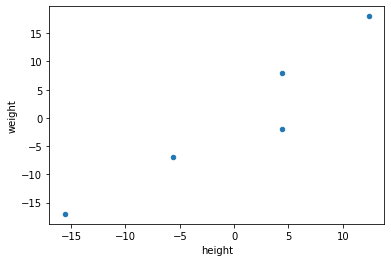

In [10]:
print(np_data.mean(axis=0))
X = np_data - np_data.mean(axis=0)
print(X)
df = pd.DataFrame(X, columns=['height', 'weight'])
df.plot.scatter(x='height', y='weight')

In [13]:
#co-variance -> 2개
# [var(height), co-var(height, weight)]
# [co-var(height, weight), var(weight)]

# X.T @ X # (2,5) x (5,2)
cov = X.T @ X / len(X)
cov

array([[ 93.44, 110.8 ],
       [110.8 , 146.  ]])

In [16]:
#eigenvalue

# Ax = Δx

eigenvalue1 = (cov.diagonal().sum() + np.sqrt(cov.diagonal().sum()**2 - 4*np.linalg.det(cov))) / 2
eigenvalue2 = (cov.diagonal().sum() - np.sqrt(cov.diagonal().sum()**2 - 4*np.linalg.det(cov))) / 2

print(eigenvalue1, eigenvalue2)

233.59395839260176 5.846041607398234


In [18]:
ev1 = np.array([-cov[0][1], cov[0][0] - eigenvalue1 ])
ev1_norm = ev1 / np.linalg.norm(ev1)
print(ev1, ev1_norm, np.sqrt(ev1_norm[0]**2 + ev1_norm[1]**2)) # np.sqrt(ev1_norm[0]**2 + ev1_norm[1]**2) = L2 norm. cf.) L2 distance, HAMMING distance

[-110.8        -140.15395839] [-0.62016874 -0.78446844] 1.0


In [23]:
ev2 = np.array([-cov[0][1], cov[0][0] - eigenvalue2 ])
ev2_norm = ev2 / np.linalg.norm(ev2)
print(ev2, ev2_norm, np.sqrt(ev2_norm[0]**2 + ev1_norm[1]**2))

[-110.8          87.59395839] [-0.78446844  0.62016874] 1.1094059105126903


In [24]:
np.dot(ev1_norm, ev2_norm)

5.551115123125783e-17

In [25]:
np.dot(ev1, ev2) # float, byte 2진수

1.8189894035458565e-12

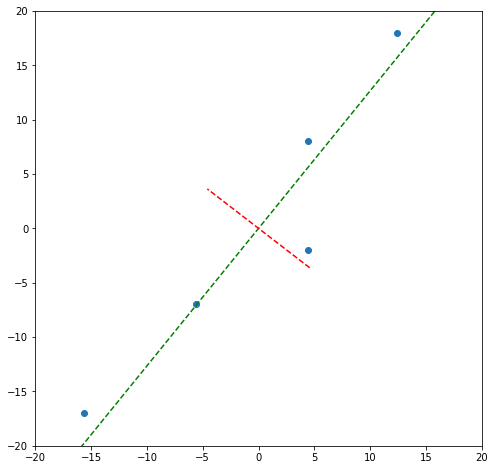

In [31]:
plt.figure(figsize=(8,8)) # inch
plt.xlim((-20, 20))
plt.ylim((-20, 20))

# pc
x = [-eigenvalue1*ev1_norm[0], eigenvalue1*ev1_norm[0]]
y = [-eigenvalue1*ev1_norm[1], eigenvalue1*ev1_norm[1]]
plt.plot(x, y, 'g--')

x = [-eigenvalue2*ev2_norm[0], eigenvalue2*ev2_norm[0]]
y = [-eigenvalue2*ev2_norm[1], eigenvalue2*ev2_norm[1]]
plt.plot(x, y, 'r--')

plt.scatter(df['height'], df['weight'])